<a href="https://colab.research.google.com/github/sophiagiuliani/sophiagiuliani/blob/main/Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


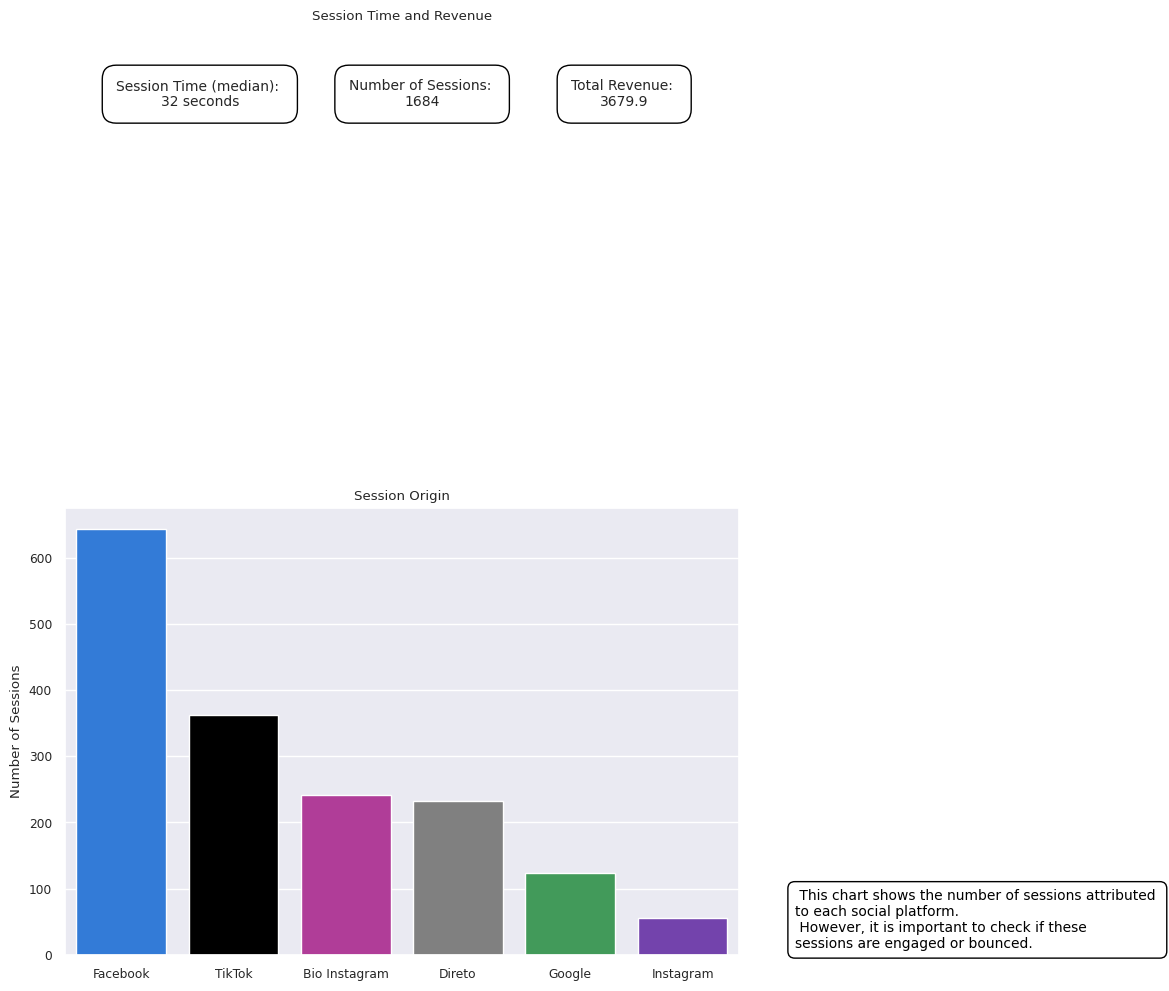

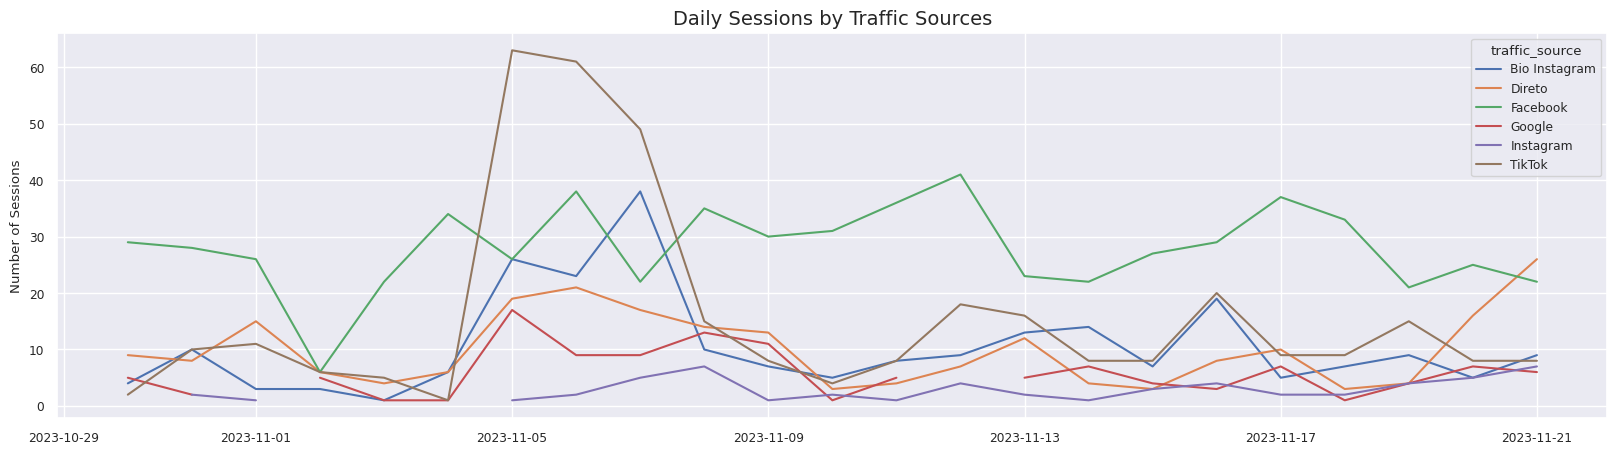

<ipython-input-67-6d304b7ce5b8>:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x/100) for x in vals])


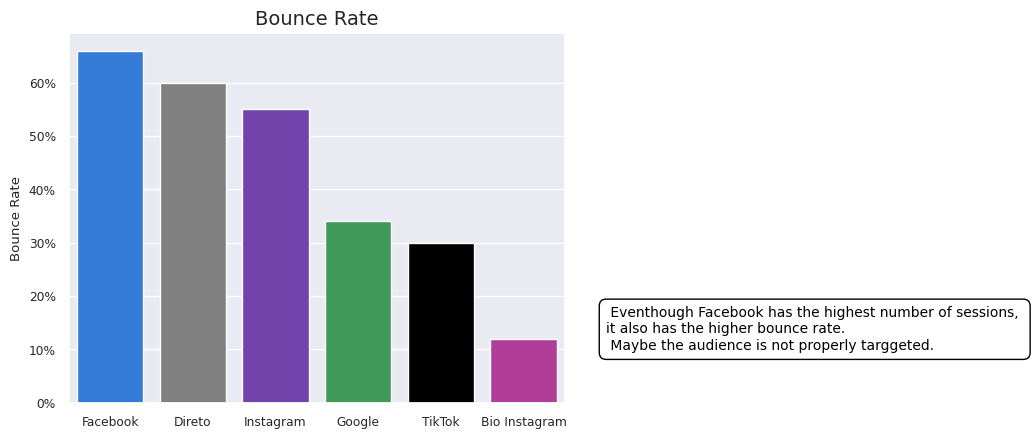

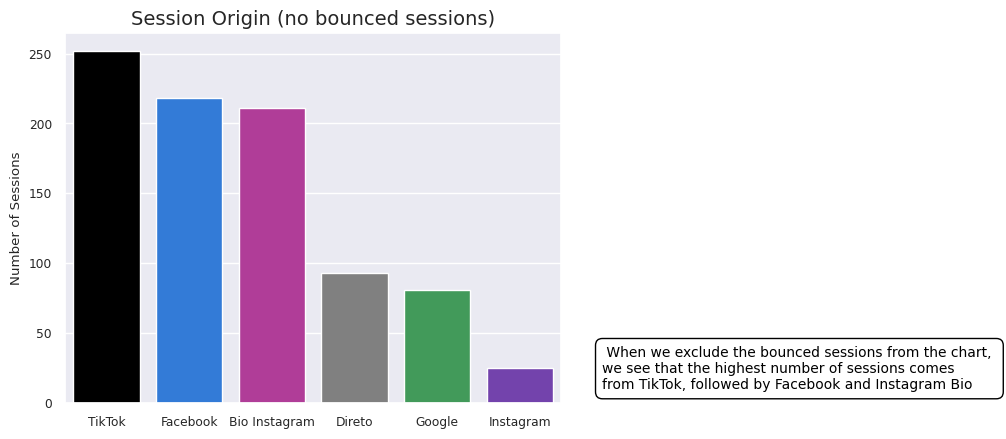

In [67]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
path_to_file = '/content/drive/MyDrive/Colab Notebooks/data_python_until_22-11.csv'
df = pd.read_csv(path_to_file)

# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data to display the count of traffic sources and order DESC, display only the first 6
traffic_source_counts = df.groupby('traffic_source').size().reset_index(name='counts')
traffic_source_counts = traffic_source_counts.sort_values(by='counts', ascending=False).head(6)

# Calculate the Median of the session time, number of sessions, total revenue (list)
import matplotlib.pyplot as plt
import numpy as np

session_time = df['session_length_sec'].tolist()
bounced_sessions = df['bounce_session'].tolist()
session_id = df['user_pseudo_id'].tolist()
total_revenue = df['revenue'].tolist()

valid_session_time = [time for time, bounced in zip(session_time, bounced_sessions) if bounced == 0]
median_session_time_list = np.median(valid_session_time)
number_of_sessions = len(session_id)
total_revenue = np.nansum(total_revenue)

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Score cards:
axs[0].text(0.2, 30, f'Session Time (median): \n{median_session_time_list:.0f} seconds', ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axs[0].text(0.53, 30, f'Number of Sessions: \n{number_of_sessions}', ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axs[0].text(0.83, 30, f'Total Revenue: \n{total_revenue}', ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
axs[0].set_ylim([0, median_session_time_list + median_session_time_list * 0.1])
axs[0].axis('off')
axs[0].set_title('Session Time and Revenue')

# Bar Chart
colors = ['#1877F2', '#000000', '#C32AA3', 'gray',  '#34a853', '#7232BD']
sns.set_style("whitegrid")
sns.set(font_scale=0.8)
sns.barplot(x='traffic_source', y='counts', data=traffic_source_counts, palette=colors, ax=axs[1])
axs[1].set_title('Session Origin')
axs[1].set_xlabel(None)
axs[1].set_ylabel('Number of Sessions')
axs[1].text(6, 10, ' This chart shows the number of sessions attributed \nto each social platform. \n However, it is important to check if these \nsessions are engaged or bounced.', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.subplots_adjust(hspace=0.1)
plt.tight_layout()
plt.show()

# Time Series Chart
df['event_date'] = pd.to_datetime(df['event_date'])
df.set_index('event_date', inplace=True)
df.index = pd.DatetimeIndex(df.index)

df = df[df['traffic_source'].isin(['Facebook', 'TikTok','Bio Instagram', 'Direto', 'Google', 'Instagram'])]

sessions_per_day = df.groupby([df.index.date, 'traffic_source']).size().unstack()

sessions_per_day.plot(figsize = (20,5))
plt.title('Daily Sessions by Traffic Sources', fontsize=14)
plt.xlabel(None)
plt.ylabel('Number of Sessions')

plt.show()

#Group the data to show bounce rate per traffic source (data frame)
sessions_by_source = df.groupby('traffic_source').size().reset_index(name='counts')
bounced_sessions_by_source = df.groupby('traffic_source')['bounce_session'].sum()

# Reset_index method to convert the Series to a DataFrame.
#This will merge the two dataframes on the traffic_source column and divide the bounce_session column of the resulting dataframe by the counts column.
merged_df = bounced_sessions_by_source.reset_index().merge(sessions_by_source.reset_index(), on='traffic_source')
merged_df['bounce_session'] = (merged_df['bounce_session'] / merged_df['counts']) * 100
merged_df['bounce_session'] = merged_df['bounce_session'].round(0)
bounce_table = merged_df

#Create bar chart
colors = ['#1877F2', 'gray', '#7232BD', '#34a853',  '#000000', '#C32AA3']
sns.set(style="whitegrid")
sns.set(font_scale=0.8)
filtered_df = merged_df.query("traffic_source in ['Facebook', 'TikTok', 'Bio Instagram', 'Direto', 'Google', 'Instagram']")

ax = sns.barplot(x="traffic_source", y="bounce_session", data=filtered_df, order=filtered_df.sort_values('bounce_session', ascending=False).traffic_source, palette = colors)

ax.set_title("Bounce Rate", fontsize=14)
ax.set_xlabel(None)
ax.set_ylabel("Bounce Rate")

plt.text(6, 10, ' Eventhough Facebook has the highest number of sessions, \nit also has the higher bounce rate. \n Maybe the audience is not properly targgeted.', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x/100) for x in vals])

plt.show()

# Session Origin without bounced sessions chart
df = df[df['bounce_session'] != 1] # Filter the bounce_session column

traffic_source_counts = df.groupby('traffic_source').size().reset_index(name='counts')
traffic_source_counts = traffic_source_counts.sort_values(by='counts', ascending=False).head(6)

# Create a bar chart
facebook = '#1877F2'
colors = ['#000000', '#1877F2', '#C32AA3', 'gray',  '#34a853', '#7232BD']
sns.set_style("whitegrid")
sns.set(font_scale=0.8)
sns.barplot(x='traffic_source', y='counts', data=traffic_source_counts, palette=colors)

plt.title('Session Origin (no bounced sessions)', fontsize=14)
plt.xlabel(None)
plt.ylabel('Number of Sessions')

plt.text(6, 10, ' When we exclude the bounced sessions from the chart, \nwe see that the highest number of sessions comes \nfrom TikTok, followed by Facebook and Instagram Bio', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()


# calculate the

